# Computing the Projection(s) of an Image

This notebook reviews some methods to compute the projections of a 2D image. The concept is explained by the figure below.

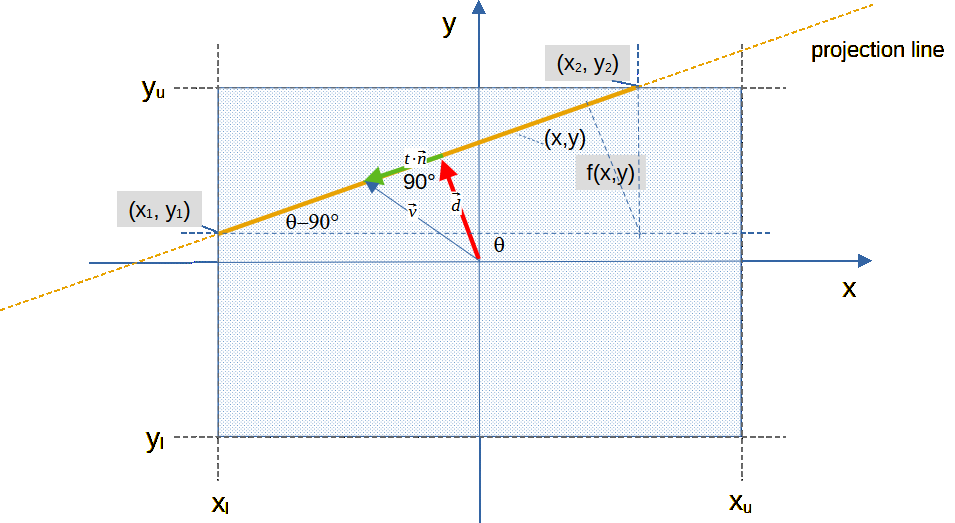

The figure is bounded by a rectangular region which is bounded by $x_l$, $y_u$, $x_u$ and $y_l$ (left, top, right, bottom).

The line (projection line) intersects the figure at points $x_1, y_1$ and $x_2, y_2$. Integrating over the figure along this line yields the projection for this particular projection line.

While there are quite a few ways to define the projection line a frequently use approach is to express the line by a vector equation like this:

$$
\vec{v} = \begin{pmatrix} x \\ y \end{pmatrix} = \underbrace{d \cdot \begin{pmatrix} cos\left( \theta \right) \\ sin\left( \theta \right) \end{pmatrix}}_{\vec{d}} + t \cdot \underbrace{\begin{pmatrix} -sin\left( \theta \right) \\ cos\left( \theta \right) \end{pmatrix}}_{\vec{n}}
$$

With this formulation of the projection line the projection $P\left(d, \theta \right)$ is computed via the integral

$$
P\left(d, \theta \right) = \int_{t_1}^{t_2} f\left(d \cdot cos\left( \theta \right) - t \cdot sin\left( \theta \right), d \cdot sin\left( \theta \right) + t \cdot cos\left( \theta \right) \right) \cdot dt
$$

**Note**

With projections $P\left(d, \theta \right)$  for many values pairs $d, \theta$ (also referred to as Radon transform) it is possible to reconstruct the image.


For a point $x_p, y_p$ the values of $d$ and $t$ are determined for a given angle $\theta$.

$$
d = x_p \cdot cos\left( \theta \right) + y_p \cdot sin\left( \theta \right)
$$

$$
t = -x_p \cdot sin\left( \theta \right) + y_p \cdot cos\left( \theta \right)
$$

The last equation is used to determine the integration limits $t_1$ and $t_2$.

$$
t_1 = -x_1 \cdot sin\left( \theta \right) + y_1 \cdot cos\left( \theta \right)
$$

$$
t_2 = -x_2 \cdot sin\left( \theta \right) + y_2 \cdot cos\left( \theta \right)
$$

## Computing Intersections

To compute the projection along a line defined by parameters $d$ and $\theta$ we need to compute the intersection points $x_1,\ y_1$ and $x_2,\ y_2$.


If the line intersects with the rectangle, an intersection may occur for these cases:

**case#1** (left)

intersection occurs on the *left side* of the rectangle for $x=x_l$ and a specific value $y$ in the range $y_l \le y \le y_u$. 

$$
x_l = d \cdot cos\left( \theta \right)  - t_{c1} \cdot sin\left( \theta \right)
$$

with $t_{c1}$ :

$$
t_{c1} = \frac{d \cdot cos\left( \theta \right) - x_l}{sin\left( \theta \right)}
$$

$$
y = d \cdot sin\left( \theta \right)  + t_{c1} \cdot cos\left( \theta \right)
$$

If $y$ is in the interval $y_l \le y \le y_u$ then we have an intersection.


**case#2** (right)

intersection occurs on the *right side* of the rectangle for $x=x_u$ and a specific value $y$ in the range $y_l \le y \le y_u$.

$$
x_u = d \cdot cos\left( \theta \right)  - t_{c2} \cdot sin\left( \theta \right)
$$

with $t_{c2}$ :

$$
t_{c2} = \frac{d \cdot cos\left( \theta \right) - x_u}{sin\left( \theta \right)}
$$

$$
y = d \cdot sin\left( \theta \right)  + t_{c2} \cdot cos\left( \theta \right)
$$

If $y$ is in the interval $y_l \le y \le y_u$ then we have an intersection.

**case#3** (top)

intersection occurs on the *top side* of the rectangle for $y=y_u$ and a specific value $x$ in the range $x_l \le x \le x_u$.

$$
y_u = d \cdot sin\left( \theta \right)  + t_{c3} \cdot cos\left( \theta \right)
$$

with $t_{c3}$ :

$$
t_{c3}= \frac{y_u - d \cdot sin\left( \theta \right)}{ cos\left( \theta \right)}
$$

$$
x = d \cdot cos\left( \theta \right)  - t_{c3} \cdot sin\left( \theta \right)
$$

If $x$ is in the interval $x_l \le x \le x_u$ we have an intersection.


**case#4** (bottom)

intersection occurs on the *bottom side* of the rectangle for $y=y_l$ and a specific value $x$ in the range $x_l \le x \le x_u$.

$$
y_l = d \cdot sin\left( \theta \right)  + t_{c4} \cdot cos\left( \theta \right)
$$

with $t_{c4}$ :

$$
t_{c4}= \frac{y_l - d \cdot sin\left( \theta \right)}{ cos\left( \theta \right)}
$$

$$
x = d \cdot cos\left( \theta \right)  - t_{c4} \cdot sin\left( \theta \right)
$$

If $x$ is in the interval $x_l \le x \le x_u$ we have an intersection.

Special cases are $\theta = 0$ and $\theta = \frac{\pi}{2}$.

**case#5: $\theta = 0$** (vertical projection line)

For $x$ in $x_l \le x \le x_u$ intersections occur at points $x, y_l$ and $x, y_u$.


**case#6: $\theta = \frac{\pi}{2}$** (horizontal projection line)

For $y$ in $y_l \le y \le y_u$ intersections occur at points $x_l, y$ and $x_u, y$.

---

## Example

The code to compute intersections is in Python file `intersections.py`.

For a pair of values $d, \theta$ the procedure checks for the conditions formulated for cases #1 to #6. Either no intersection can be found of two intersections can be found.

To demonstrate the application of function `intersections.py` a rectangle is defined with corners at $\left(x_l=-5, y_l=-6 \right)$, $\left(x_l=-5, y_u= 7 \right)$, $\left(x_u=4, y_l=-6 \right)$ and $\left(x_u=4, y_u=7 \right)$. (The image is represented in a physical coordinate system (x,y) as opposed to image coordinates which are frequently used in the representation of discrete / digital images (eg. captured from a digital camera).

The rectangle is displayed along with the intersections and the projection line which interconnects the intersections.

In [1]:
#%matplotlib inline
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import math
sys.path.append(os.path.join(os.getcwd(), 'modules'))
import intersections as isec
import cv2

In [2]:
# the rectangular region
x_l = -5
x_u = 4.0
y_l = -6.0
y_u = 7.0

# line parameters
d = 4.5
theta_deg = 171.0
dx = d * math.cos(math.radians(theta_deg))
dy = d * math.sin(math.radians(theta_deg))

In [3]:
# compute intersections if there are any ...
pCount, iPoints = isec.intersections(d, theta_deg, x_l, x_u, y_l, y_u)
print(f"pCount  : {pCount}")
print(f"iPoints : {iPoints}")

pCount  : 2
iPoints : [[-5, -2.802718076626738], [-3.4474019837742578, 7.0]]


In [4]:

if pCount == 2:
    # tuple (x1, x2)
    xvec = [iPoints[0][0], iPoints[1][0]]
    # tuple (y1, y2)
    yvec = [iPoints[0][1], iPoints[1][1]]
    # integration limits (t1, t2)
    t1 = -xvec[0] * math.sin(math.radians(theta_deg)) + yvec[0] * math.cos(math.radians(theta_deg))
    t2 = -xvec[1] * math.sin(math.radians(theta_deg)) + yvec[1] * math.cos(math.radians(theta_deg))
    delta_x = abs(xvec[0] - xvec[1])
    delta_y = abs(yvec[0] - yvec[1])
    len_projection = math.sqrt(delta_x**2 + delta_y**2)
    # len_projection should be (t2 - t1)
    print(f"t1: {t1}, t2: {t2}, t2 - t1: {t2-t1} ,  len_projection: {len_projection}")

t1: 3.5503842914606136, t2: -6.374525899055607, t2 - t1: -9.92491019051622 ,  len_projection: 9.92491019051622


### Display Intersection (if available)

1) The figure below shows the rectangle bounded by a blue boundary. 

2) Vector $\vec{d}$ is shown as a red arrow. 

3) The part of the intersecting line which is within the rectangle is displayed in green.

4) Green dots indicate the intersection points $x_1, y_1$ and $x_2, y_2$

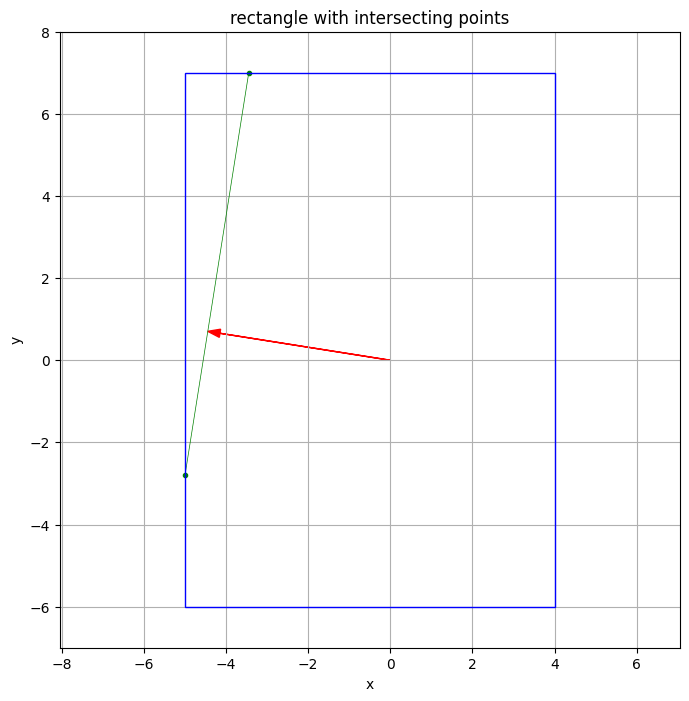

In [5]:
fig1 = plt.figure(1, figsize=[8, 8])
ax_f1 = fig1.add_subplot(1, 1, 1)
ax = plt.gca()
ax_f1.add_patch(pat.Rectangle( (x_l, y_l), width=(x_u - x_l), height=(y_u - y_l), edgecolor='b', facecolor='lightgrey', fill=False, zorder=3))
# ax_f1.legend()

# plot arrow
ax_f1.arrow(0, 0, dx, dy, color='r', length_includes_head=True, head_width=0.2)

# plot intersecting line
if pCount == 2:
    ax_f1.plot(xvec, yvec, color='g', linewidth=0.5, marker='o', markersize=3)

ax_f1.axis('equal')
ax_f1.grid(True)
ax_f1.set_xlabel('x')
ax_f1.set_ylabel('y')
ax_f1.set_title('rectangle with intersecting points');
ax_f1.set_xlim(x_l - 1, x_u + 1)
ax_f1.set_ylim(y_l - 1, y_u + 1);

## Computing the Projection for a discrete Image

The definition of a projection $P\left(d, \theta \right)$ along a line has been defined for a continous function / image $f(x,y)$. 

Now we discuss the case where the image $f(x, y)$ is defined for discrete points on a rectangular grid with $N_y$ rows and $N_x$ columns. Thus
the image has a total of $N_y \cdot N_x$ points.

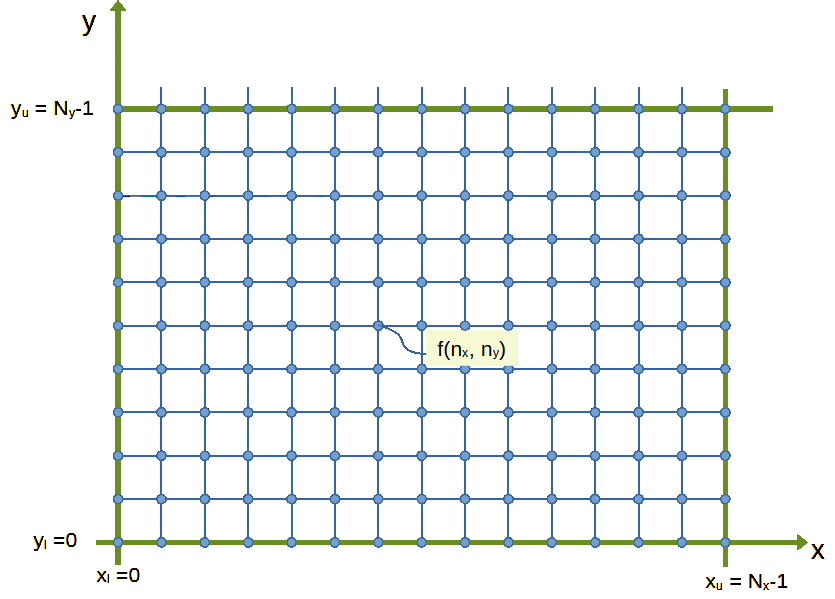

Here we are using **physical** coordinates for the discrete image points $f(n_x, n_y)$. If images are loaded from a file the image points are represented
in a **image** coordinate system. Then an image is represented in matrix notation (row, col)-order with the upper left corner of the image at $f(0,0)$.


## Definition of a Projection

Being able to compute the intersection points we can now compute the projection of an image along a straight line defined by parameters $d, \theta$. A discretized image will be assumed. With $N_y$ pixel in y-direction and $N_x$ pixels in x direction the image boundaries are as follows:

1) left border: $x_l = 0$ and $0 \le y \le N_y-1$

2) top / upper border: $y_u = N_y-1$ and $0 \le x \le N_x-1$
  
3) right border: $x_u = N_x-1$ and $0 \le y \le N_y-1$

4) bottom border: $y_l = 0$ and $0 \le x \le N_x-1$

The procedure to compute a projection is outlined here:

1) for parameters $d, \theta$, compute whether the line intersects the figure. If an intersection occurs return the number of intersections (must be 2 of course) and the intersection points $x_1, y_1$ and $x_2, y_2$. If there is no intersection return the number of intersections as 0 and the intersection points as None values. Function `intersections.py` conputes the intersection points.

2) If intersection points $x_1, y_1$ and $x_2, y_2$ have been found, collect the row / column indices along the *projection line* which interconnects the intersection points. Function `projectionIndices` computes the row / column indices of a projection line.

3) Summing up all pixel values of the image along the projection line yields the value of the projection. The row / column indices computed from function `projectionIndices` are used to select the pixels pertaining to the projection line. Function `projectionSingleLine` computes the value of the projection using functions `intersections.py` and `projectionIndices`

Two figures illustrate the procedure of collecting the appropriate row / column indices along a projection line.

The first figure shows a case, where y coordinate changes by larger amount than the x coordinate when moving along the projection line from pixel to pixel. A second figure shows the opposite situation. Here the x coordinate changes by a larger amount than y when moving from pixel to pixel.

No interpolation of pixel values is used to keep computations simple.


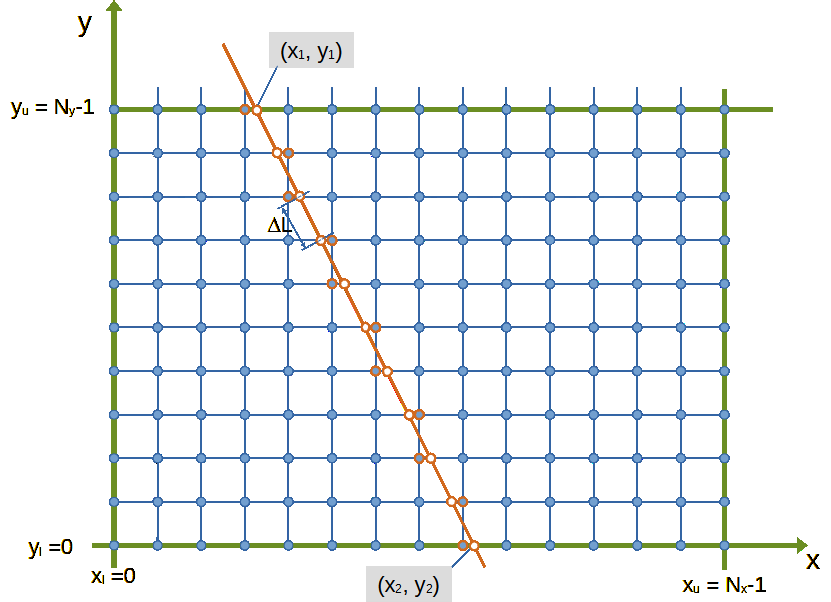



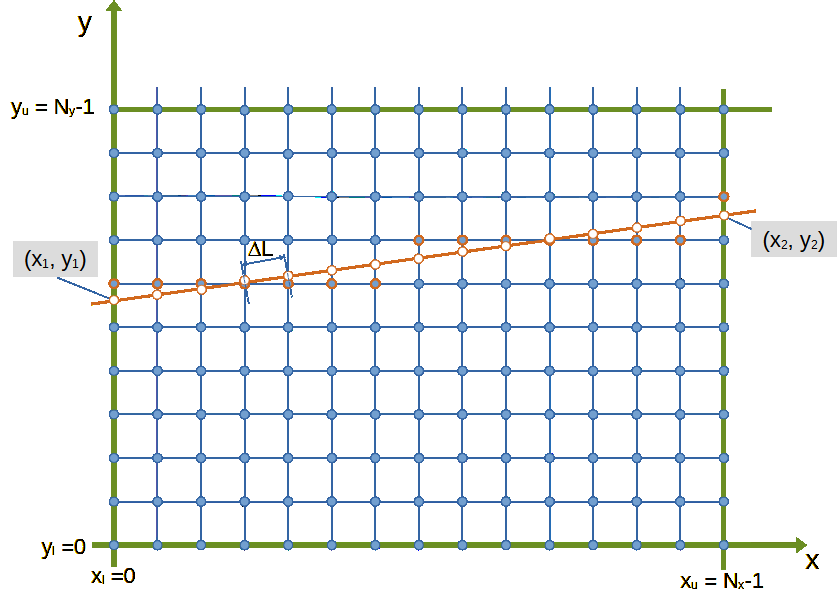





## Application to an Image

The use of functions `intersections(...)` and `projectionIndices(...)` shall be demonstrated using a simple image. The image is computed in 
Jupyter notebook `test_images_rd1.ipynb` and stored in file.

1) Load image from file

2) compute intersections for a set of $d$ and $\theta$.

3) plot intersections using function `intersections(...)`

4) plot the line connection the intersection points

5) plot the projection line computed from function `projectionIndices(...)`


### Loading file

1) Determine the shape of image data `Nx` number of columns and `Ny` the number of rows

2) Define the rectangular region which encloses the image

    1) the rectangular boudaries of the image are determines by 4 points:

        1) lower left corner: (x_l, y_l)
          
        2) upper left corner  (x_l, y_u)
      
        3) lower right corner: (x_u, y_l)
      
        4) upper right corner: (x_u, y_u)
      
**Note** 

At this point *no* image coordinates are used. (image coordinates have the upper left corner at (0,0))

In [6]:
# load file
imgFile = "images/testImgRect1.npy"
img = np.load(imgFile)
Nx = img.shape[1]
Ny = img.shape[0]
print(f"size of image: {img.size} ; shape of image: {img.shape}")

size of image: 1800000 ; shape of image: (1000, 1800)


In [7]:
# Define boundaries of the rectangular region
x_l = 0  # left x
x_u = Nx - 1 # right x
y_l = 0 # bottom y
y_u = Ny - 1 # top y

### Compute a projection line

**Recipe**

1) For fixed parameters $d$ and $\theta$ the intersecting points (if there are any) of the the projection line are determined

2) The projection line is defined by an array of x-Indices `indexX` an an array of y-Indices `indexY`


In [8]:
# line parameters
d = 1000
phi_deg = 40.0

# compute intersections
pCount, iPoints = isec.intersections(d, phi_deg, x_l, x_u, y_l, y_u)

if len(iPoints) == 2:
    # intersection
    x1 = iPoints[0][0]
    y1 = iPoints[0][1]
    x2 = iPoints[1][0]
    y2 = iPoints[1][1]
    indexX, indexY = isec.projectionIndices(iPoints, Nx, Ny)
    
    dx = x2 - x1
    dy = y2 - y1
    if dx != 0:
        slope = dy/dx
    else:
        slope = math.nan
        
    print(f"slope : {slope}")
    print(f"pCount  : {pCount}")
    print(f"iPoints : {iPoints}")
    print(f"dx : {dx} ; dy : {dy}")

slope : -1.1917535925942102
pCount  : 2
iPoints : [[467.1467577861758, 999], [1305.4072893322784, 0]]
dx : 838.2605315461026 ; dy : -999


### Applying corrections for image coordinates

The image is displayed in image coordinates with x=0 y=0 being the upper left corner of the image. However
the intersection points and indices of the projection line have been computed in physical x/y coordinates. Before plotting the intersection points and the projection line the physical coordinates must be transformed to image coordinates.

The transformation only affects the physicaly coordinate. It is is flipped *up / down* using `Ny -1 - (physical_Y_coordinates)`

The figure below shows an excellent match of both variants of projection lines.

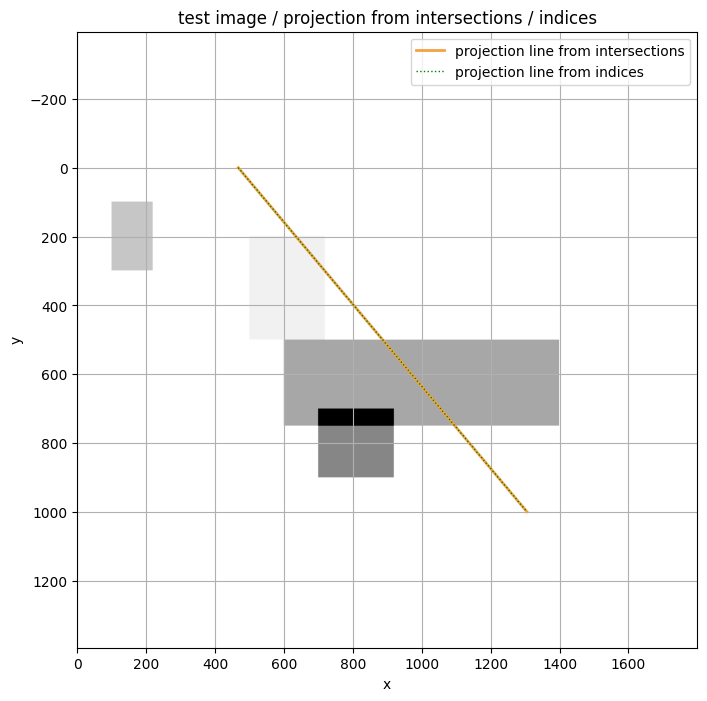

In [9]:
fig2 = plt.figure(2, figsize=[8, 8])
ax_f2 = fig2.add_subplot(1, 1, 1)

# plot of image
ax_f2.imshow(img, cmap='Greys' )
ax_f2.axis('equal')
# plot projection line from intersections, the y coordinates must be transformed to image coordinates
ax_f2.plot([x1, x2], [Ny - 1 - y1, Ny - 1 - y2], linewidth=2, color='#f5a142', label='projection line from intersections')
# plot projection line from indices indexX and indexY; again y coordinates must be transformed to image coordinates
ax_f2.plot(indexX, Ny -1 - indexY, linewidth=1, color='g', linestyle=':', label='projection line from indices')
ax_f2.grid(True)
ax_f2.set_xlabel('x')
ax_f2.set_ylabel('y')
ax_f2.legend()
ax_f2.set_title('test image / projection from intersections / indices');

## Computing Projections

1) define a fixed angle $\theta$ for which projections shall be computed

2) define an array of d-values

3) for each d-value compute a projection line and the accumulated value along that line

4) display the image and the projection lines

5) display the projection as a function of d-values for a constant angle $\theta$.


In [10]:
# the rectangular region
x_l = 0
x_u = Nx - 1
y_l = 0
y_u = Ny - 1

# line parameters
d_min = -2000
d_max = 2000
Nd = 200
# array of d-values
dVec = np.linspace(d_min, d_max, Nd)
# fixed angle
theta_deg = 30.0

# compute projection for elements of dVec and fixed angle theta_deg
projections = isec.projectionMultiLine(dVec, theta_deg, img, x_l, x_u, y_l, y_u, Nx, Ny, placeholder=math.nan, debug=False)

Text(0.5, 1.0, 'projection : @$\\theta$:   30.000 ° [deg]')

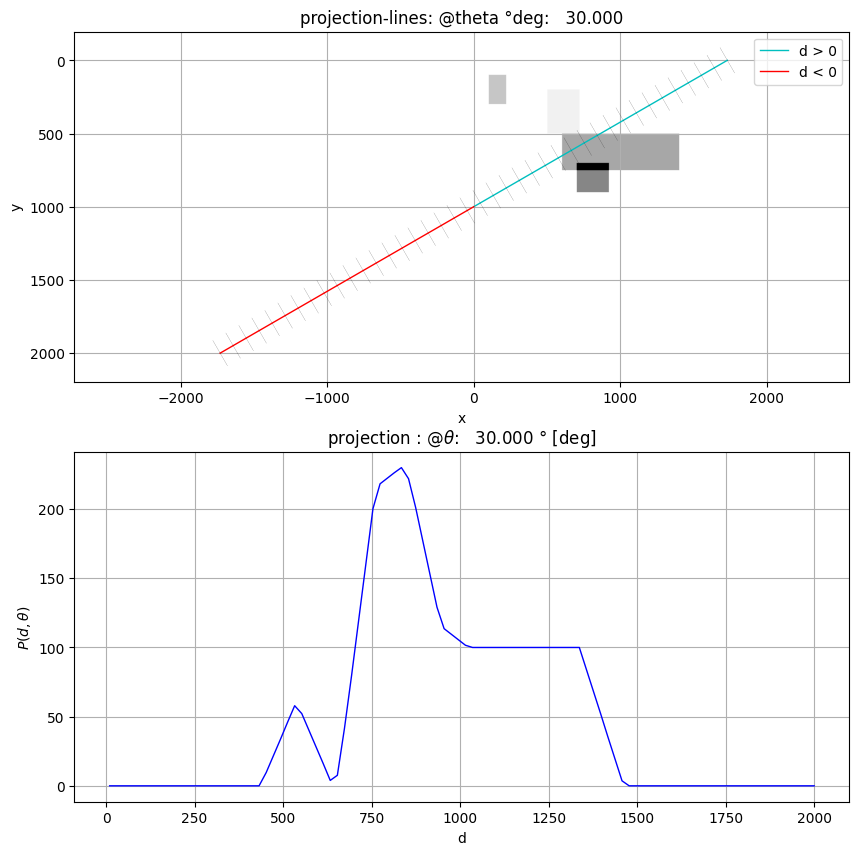

In [11]:
fig3 = plt.figure(3, figsize=[10, 10])
ax_f31 = fig3.add_subplot(2, 1, 1)
ax_f31.imshow(img, cmap='Greys' )

ax_f31.axis('equal')

# unit d-vector (dx, dy)
dx = math.cos(math.radians(theta_deg))
dy = math.sin(math.radians(theta_deg))
# unit n-vector (nx, ny)
nx = -math.sin(math.radians(theta_deg))
ny = math.cos(math.radians(theta_deg))

# projection lines
d_xmax = d_max * dx
d_y_xmax = d_max * dy
d_xmin = d_min * dx
d_y_xmin = d_min * dy

if d_max > 0:
    ax_f31.plot([0, d_xmax], [Ny - 1, Ny - 1 - d_y_xmax], linewidth=1, color='c', label='d > 0')
else:
    ax_f31.plot([0, d_xmax], [Ny - 1, Ny - 1 - d_y_xmax], linewidth=1, color='r', label='d < 0')

if d_min > 0:
    ax_f31.plot([0, d_xmin], [Ny - 1, Ny - 1 - d_y_xmin], linewidth=1, color='c', label='d > 0')
else:
    ax_f31.plot([0, d_xmin], [Ny - 1, Ny - 1 - d_y_xmin], linewidth=1, color='r', label='d < 0')

t = 100
nPLines = 40

for d in np.linspace(d_min, d_max, num=nPLines):
    # point (x1, y1)  on projection line
    x1 = d*dx - t*nx
    y1 = d*dy - t*ny
    # point (x2, y1)  on projection line
    x2 = d*dx + t*nx
    y2 = d*dy + t*ny
    ax_f31.plot([x1, x2], [Ny - 1 - y1, Ny - 1 - y2], linewidth=0.1, color='k')

ax_f31.grid(True)
ax_f31.set_xlabel('x')
ax_f31.set_ylabel('y')
ax_f31.legend()
ax_f31.set_title(f"projection-lines: @theta °deg: {theta_deg:8.3f}")

# plot projection as a subplot
ax_f32 = fig3.add_subplot(2, 1, 2)
ax_f32.plot(dVec, projections, linewidth=1, color='b', linestyle='-')
ax_f32.grid(True)
ax_f32.set_xlabel('d')
ax_f32.set_ylabel('$P(d, \\theta)$')
ax_f32.set_title(f"projection : @$\\theta$: {theta_deg:8.3f} ° [deg]")

## Computing a Sinogram

A sinogram is the display of all projection values versus a set of $N_d$ values of $d$ and $N_{theta}$ values of angle $\theta$.

From the image used previously the sinogram is computed and displayed as an image.

In [12]:
d_min = -2000
d_max = 2000
Nd = 400
dVec = np.linspace(d_min, d_max, Nd)

Ntheta = 400
thetaVec_deg = np.linspace(0, 179, Ntheta)

# initalise matrix
sinogram = np.zeros((Ntheta, Nd), dtype=np.float64)

for nc, theta in enumerate(thetaVec_deg):
    # compute projection
    sinogram[nc, :] = isec.projectionMultiLine(dVec, theta, img, x_l, x_u, y_l, y_u, Nx, Ny, placeholder=math.nan, debug=False)



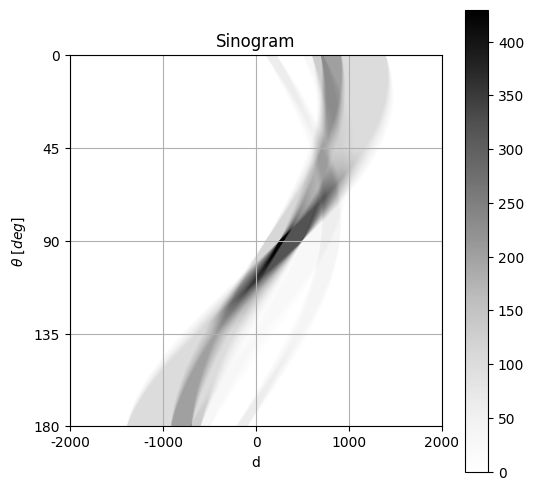

In [13]:
fig4 = plt.figure(4, figsize=[6, 6])
ax_f41 = fig4.add_subplot(1, 1, 1)
# a = ax_f41.imshow(sinogram, cmap='hot' )
a = ax_f41.imshow(sinogram, cmap='Greys' )

ax_f41.grid(True)
ax_f41.set_xlabel('d')
ax_f41.set_ylabel('$\\theta \ [deg]$ ')
ax_f41.set_title(f"Sinogram")

yticks = [0, 100, 200, 300, 399]
ytickLabels = ['0', '45', '90', '135', '180']
ax_f41.set_yticks(yticks, ytickLabels)

xticks = [0, 100, 200, 300, 400]
xtickLabels = ['-2000', '-1000', '0', '1000', '2000'];
ax_f41.set_xticks(xticks, xtickLabels)

fig4.colorbar(a, ax=ax_f41, location='right');

## Why is it called a Sinogram ? 

Consider all projection lines defined by $d, \theta$ which pass through a point at $x_p, y_p$. Assume that the value $f(x_p, y_p)$ at this point has a value of $v$ and all other image points have *zero* value (point image). Then all projections have a value of $v$.

From the equation

$$
\begin{pmatrix} x_p \\ y_p \end{pmatrix} = d \cdot \begin{pmatrix} cos\left( \theta \right) \\ sin\left( \theta \right) \end{pmatrix} + t \cdot \begin{pmatrix} -sin\left( \theta \right) \\ cos\left( \theta \right) \end{pmatrix}
$$

the values of $d$ and $t$ are determined for a given angle $\theta$.

$$
d = x_p \cdot cos\left( \theta \right) + y_p \cdot sin\left( \theta \right)
$$

$$
t = -x_p \cdot sin\left( \theta \right) + y_p \cdot cos\left( \theta \right)
$$

For our purpose only the equation for $d$ is interesting. To gain more insight the equation is rewritten:

$$
d = \sqrt{x_{p}^2 + y_{p}^2 } \cdot \left( \frac{x_p}{\sqrt{x_{p}^2 + y_{p}^2 }} \cdot cos\left( \theta \right) + \frac{y_p}{\sqrt{x_{p}^2 + y_{p}^2}} \cdot sin\left( \theta \right) \right)
$$

Using definitions 

$$
sin\left( \phi \right) = \frac{x_p}{\sqrt{x_{p}^2 + y_{p}^2 }}
$$

$$
cos\left( \phi \right) = \frac{y_p}{\sqrt{x_{p}^2 + y_{p}^2 }}
$$

and

$$
tan\left( \phi \right) = \frac{sin\left( \phi \right)}{cos\left( \phi \right)} = \frac{x_p}{y_p}
$$

the equation for $d$ can now be written more compactly as:

$$
d = \sqrt{x_{p}^2 + y_{p}^2 } \cdot \left( sin\left( \phi \right) \cdot cos\left( \theta \right) + cos\left( \phi \right)  \cdot sin\left( \theta \right) \right)
$$

and finally as:

$$
d = \sqrt{x_{p}^2 + y_{p}^2 } \cdot sin\left( \theta + \phi\right)
$$

**Summary**

A single point $x_p, y_p$ of a figure $f(x,\ y$ is transformed into a *sinogram* which is *sinusoidal* dependent on angle $\theta$. The phase constant phase $\phi$ depends on point coordinates with $\phi = arctan\left( \frac{x_p}{y_p} \right)$


## Demonstration of a Sinogram of an Image with 3 Points

The sinogram of an image with only 3 non-zero pixels is computed with function `projectionMultiLine` . The sinogram is displayed. It is composed
of 3 sinusoids.

Additionally the sinogram of one of the 3 points is computed *analytically*. Apparently the analytical result matches the computation with `projectionMultiLine`.

In [14]:
# the rectangular region
Ny2 = 200
Nx2 = 200

# physical dimension of region
x_l2 = 0
x_u2 = Nx2 - 1
y_l2 = 0
y_u2 = Ny2 - 1

# parameters for d-vector and angle vector
d_min2 = -300
d_max2 = 300
Nd2 = 600
dVec2 = np.linspace(d_min2, d_max2, Nd2)
Ntheta2 = 400
thetaVec2_deg = np.linspace(0, 179, Ntheta2)

# image: 3 points
img2 = np.zeros((Ny2, Nx2), dtype=np.float64)
# colum , row of point1 (p1)
nc_p1 = 50
nr_p1 = 50
# colum , row of point2 (p2)
nc_p2 = 150
nr_p2 = 130
# colum , row of point3 (p3)
nc_p3 = 100
nr_p3 = 180

img2[nr_p1, nc_p1] = 1
img2[nr_p2, nc_p2] = 1
img2[nr_p3, nc_p3] = 1

# initalise matrix of sinogram
sinogram2 = np.zeros((Ntheta2, Nd2), dtype=np.float64)

for ncol, theta in enumerate(thetaVec2_deg):
    # compute projection
    sinogram2[ncol, :] = isec.projectionMultiLine(dVec2, theta, img2, x_l2, x_u2, y_l2, y_u2, Nx2, Ny2, placeholder=math.nan, debug=False)

In [15]:
# compute sinogram for single point1
# compute physical coordinates
x_p1 = nc_p1
y_p1 = Ny2 - 1 - nr_p1

R = math.sqrt(x_p1**2 + y_p1**2)
A = x_p1/R
B = y_p1/R

# corresponding d values
da_p1 = R * (A * np.cos(np.pi * thetaVec2_deg/180) + B * np.sin(np.pi * thetaVec2_deg/180))

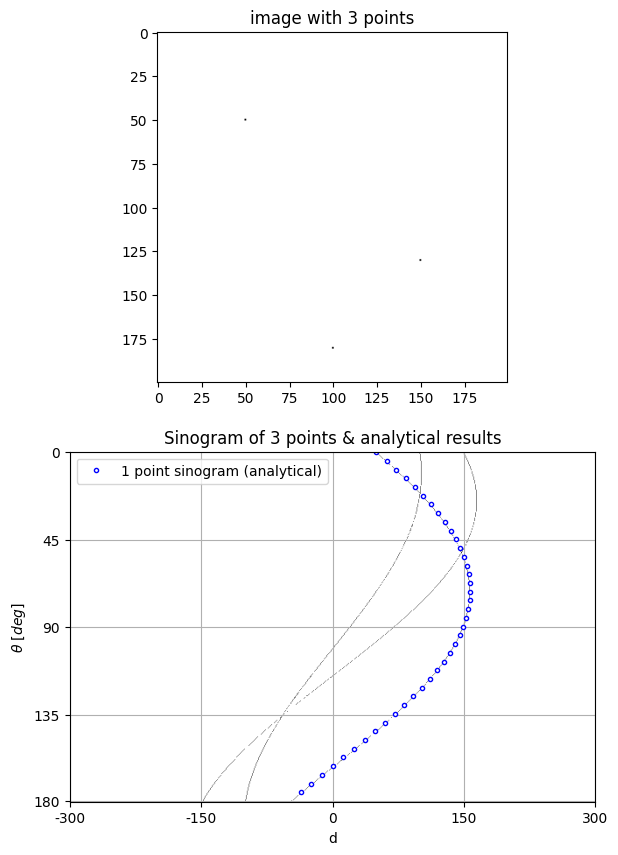

In [16]:
fig_width = 10
fig_height = 10
fig5 = plt.figure(5, figsize=[fig_width, fig_height])

ax_f51 = fig5.add_subplot(2, 1, 1)
ax_f51.imshow(img2, cmap='binary')
ax_f51.set_title(f"image with 3 points")

ax_f52 = fig5.add_subplot(2, 1, 2)
a = ax_f52.imshow(sinogram2, cmap='binary')

# superimpose analytical computed sinogram of point1 with sinogram2
# plot only every 10'th item to avoid masking sinogram2 (3 points)
# -> excellent match ...
d_offset = 300
scale = Ntheta2/180
ax_f52.plot(da_p1[::10] + 300, scale * thetaVec2_deg[::10], linestyle='none', marker='o', markeredgecolor='b', markerfacecolor='w', markersize=3, label='1 point sinogram (analytical)')

ax_f52.grid(True)
ax_f52.set_xlabel('d')
ax_f52.set_ylabel('$\\theta \ [deg]$ ')
ax_f52.set_title(f"Sinogram of 3 points & analytical results")
ax_f52.legend()

yticks2 = [0, 100, 200, 300, 399]
ytickLabels2 = ['0', '45', '90', '135', '180']
ax_f52.set_yticks(yticks2, ytickLabels2)

xticks2 = [0, 150, 300, 450, 600]
xtickLabels2 = ['-300', '-150', '0', '150', '300'];
ax_f52.set_xticks(xticks2, xtickLabels2);


### Other Examples

In these examples the sinograms are computed from grayscale images which exhibit some structure (eg.: lines).

In [17]:
imgFile2 = "images/tree_dublin.png"
img2 = cv2.imread(imgFile2, cv2.IMREAD_REDUCED_GRAYSCALE_2)
Nx2 = img2.shape[1]
Ny2 = img2.shape[0]
print(f"size of image: {img2.size} ; shape of image: {img2.shape}")

# Define boundaries of the rectangular region
x_l2 = 0  # left x
x_u2 = Nx2 - 1 # right x
y_l2 = 0 # bottom y
y_u2 = Ny2 - 1 # top y

d_min = -2000
d_max = 2000
Nd = 800
dVec = np.linspace(d_min, d_max, Nd)

Ntheta = 600
thetaVec_deg = np.linspace(0, 179, Ntheta)

# initalise matrix
sinogram2 = np.zeros((Ntheta, Nd), dtype=np.float64)

for nc, theta in enumerate(thetaVec_deg):
    # compute projection
    sinogram2[nc, :] = isec.projectionMultiLine(dVec, theta, img2, x_l2, x_u2, y_l2, y_u2, Nx2, Ny2, placeholder=math.nan, debug=False)

size of image: 480000 ; shape of image: (600, 800)


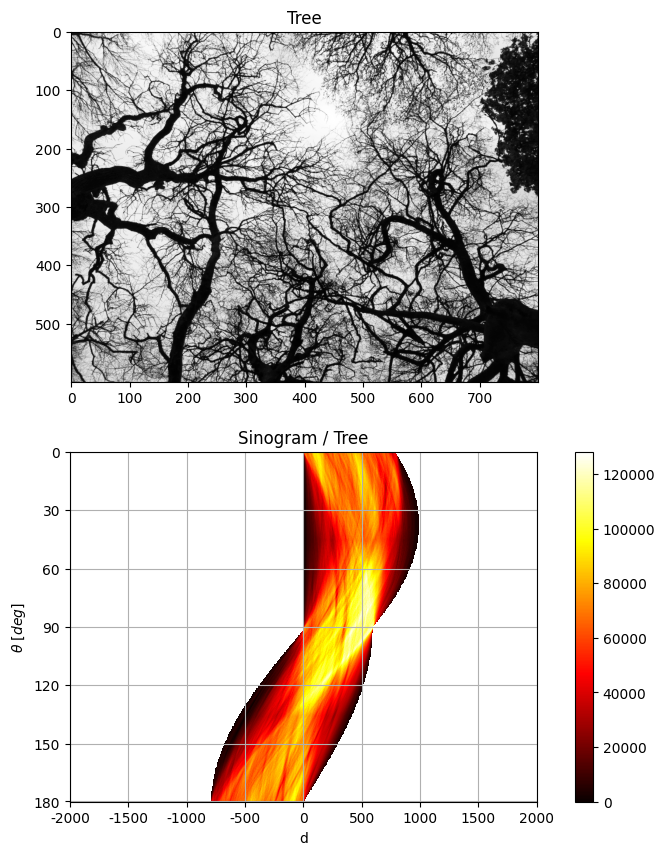

In [18]:
fig6 = plt.figure(6, figsize=[10, 10])
ax_f61 = fig6.add_subplot(2, 1, 1)

# plot of image
ax_f61.imshow(img2, cmap='Greys_r')
ax_f61.set_title("Tree")

# sinogram
ax_f62 = fig6.add_subplot(2, 1, 2)
a = ax_f62.imshow(sinogram2, cmap='hot' )
ax_f62.grid(True)
ax_f62.set_xlabel('d')
ax_f62.set_ylabel('$\\theta \ [deg]$ ')
ax_f62.set_title("Sinogram / Tree")

yticks = [0, 100, 200, 300, 400, 500, 599]
ytickLabels = ['0', '30', '60', '90', '120', '150', '180']
ax_f62.set_yticks(yticks, ytickLabels)

xticks = [0, 100, 200, 300, 400, 500, 600, 700, 800]
xtickLabels = ['-2000', '-1500', '-1000', '-500', '0', '500', '1000', '1500', '2000'];
ax_f62.set_xticks(xticks, xtickLabels)

fig6.colorbar(a, ax=ax_f62, location='right');

In [19]:
imgFile3 = "images/lamp_dublin_1.png"
img3 = cv2.imread(imgFile3, cv2.IMREAD_REDUCED_GRAYSCALE_2)
Nx3 = img3.shape[1]
Ny3 = img3.shape[0]
print(f"size of image: {img3.size} ; shape of image: {img3.shape}")

# Define boundaries of the rectangular region
x_l3 = 0  # left x
x_u3 = Nx3 - 1 # right x
y_l3 = 0 # bottom y
y_u3 = Ny3 - 1 # top y

d_min = -2000
d_max = 2000
Nd = 800
dVec = np.linspace(d_min, d_max, Nd)

Ntheta = 600
thetaVec_deg = np.linspace(0, 179, Ntheta)

# initalise matrix
sinogram3 = np.zeros((Ntheta, Nd), dtype=np.float64)

for nc, theta in enumerate(thetaVec_deg):
    # compute projection
    sinogram3[nc, :] = isec.projectionMultiLine(dVec, theta, img3, x_l3, x_u3, y_l3, y_u3, Nx3, Ny3, placeholder=math.nan, debug=False)

size of image: 480000 ; shape of image: (800, 600)


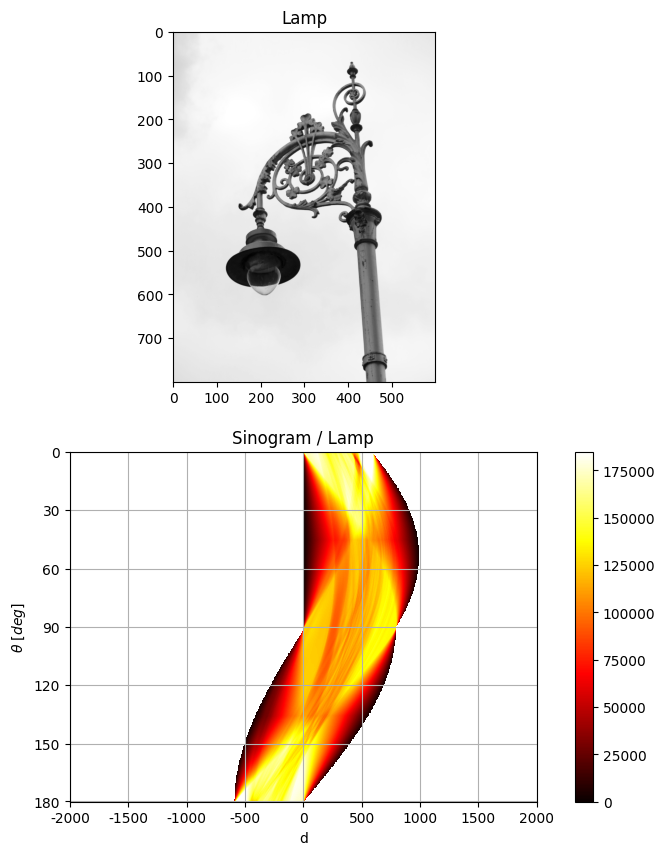

In [20]:
fig7 = plt.figure(7, figsize=[10, 10])
ax_f71 = fig7.add_subplot(2, 1, 1)

# plot of image
ax_f71.imshow(img3, cmap='Greys_r')
ax_f71.set_title("Lamp")

# sinogram
ax_f72 = fig7.add_subplot(2, 1, 2)
a = ax_f72.imshow(sinogram3, cmap='hot' )

ax_f72.grid(True)
ax_f72.set_xlabel('d')
ax_f72.set_ylabel('$\\theta \ [deg]$ ')
ax_f72.set_title("Sinogram / Lamp")

yticks = [0, 100, 200, 300, 400, 500, 599]
ytickLabels = ['0', '30', '60', '90', '120', '150', '180']
ax_f72.set_yticks(yticks, ytickLabels)

xticks = [0, 100, 200, 300, 400, 500, 600, 700, 800]
xtickLabels = ['-2000', '-1500', '-1000', '-500', '0', '500', '1000', '1500', '2000'];
ax_f72.set_xticks(xticks, xtickLabels)

fig7.colorbar(a, ax=ax_f72, location='right');